# Notes on normality tests

In [5]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import normaltest, kstest
import statsmodels.api as sm
from statsmodels.stats.diagnostic import lilliefors

## Data creation

* Normal distribution - simulated height data
* Non-normal distribution - simulated income data

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# 1. Create datasets

# Normal dataset: Heights of individuals (in cm)
normal_data = np.random.normal(170, 10, 1000)  # mean=170, std=10, size=1000

# Non-normal dataset: Right-skewed income distribution
non_normal_data = np.random.exponential(scale=50000, size=1000)

# Create DataFrames for easier handling
df_normal = pd.DataFrame({'value': normal_data, 'type': 'Normal'})
df_non_normal = pd.DataFrame({'value': non_normal_data, 'type': 'Non-normal'})
df_combined = pd.concat([df_normal, df_non_normal])

## Visual inspection

* Histograms with KDE (Kernel Density Estimation)
    * Histograms show the distribution of the data
    * KDE is a smoothed version of the histogram
    * 
* Q-Q plots 
  * quantiles of the data against quantiles of the normal distribution
  * if the data is normally distributed, the points should fall on a straight line
  * the closer the points are to the line, the more normal the data is

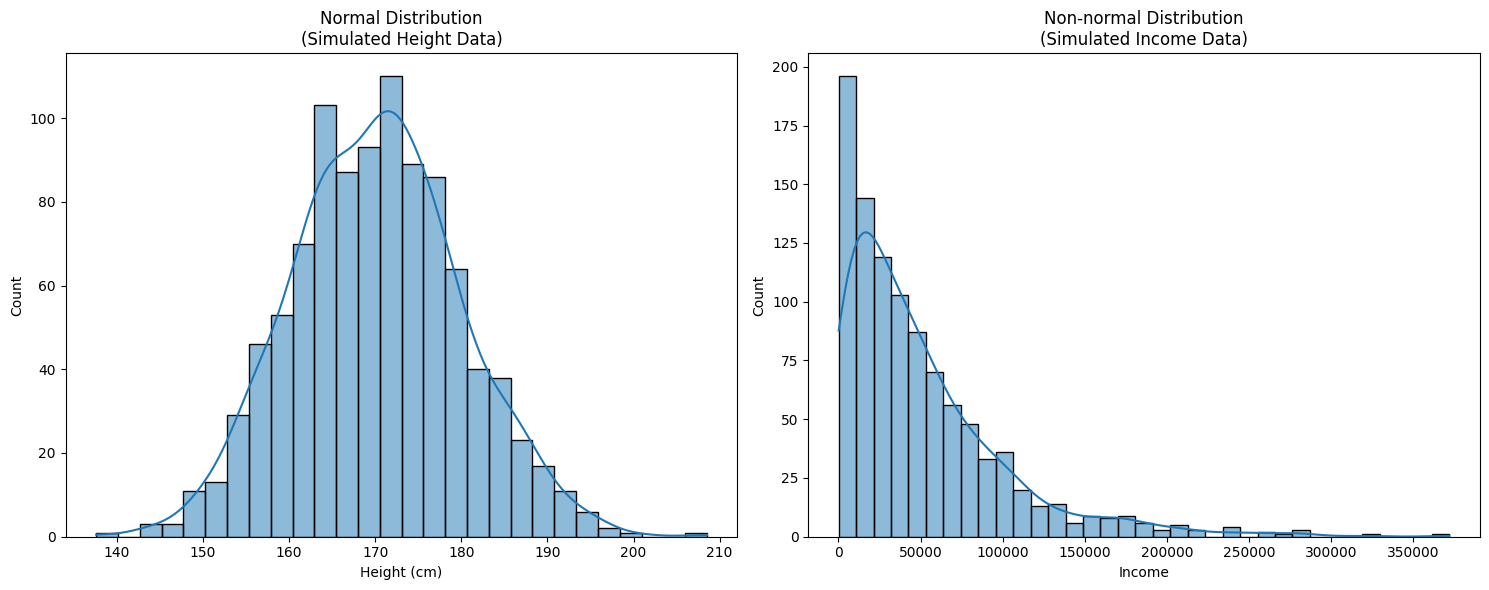

In [3]:
# 2. Visual Analysis
# Create figure for histograms with KDE
plt.figure(figsize=(15, 6))

# Normal data
plt.subplot(1, 2, 1)
sns.histplot(data=df_normal['value'], kde=True)
plt.title('Normal Distribution\n(Simulated Height Data)')
plt.xlabel('Height (cm)')
plt.ylabel('Count')

# Non-normal data
plt.subplot(1, 2, 2)
sns.histplot(data=df_non_normal['value'], kde=True)
plt.title('Non-normal Distribution\n(Simulated Income Data)')
plt.xlabel('Income')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

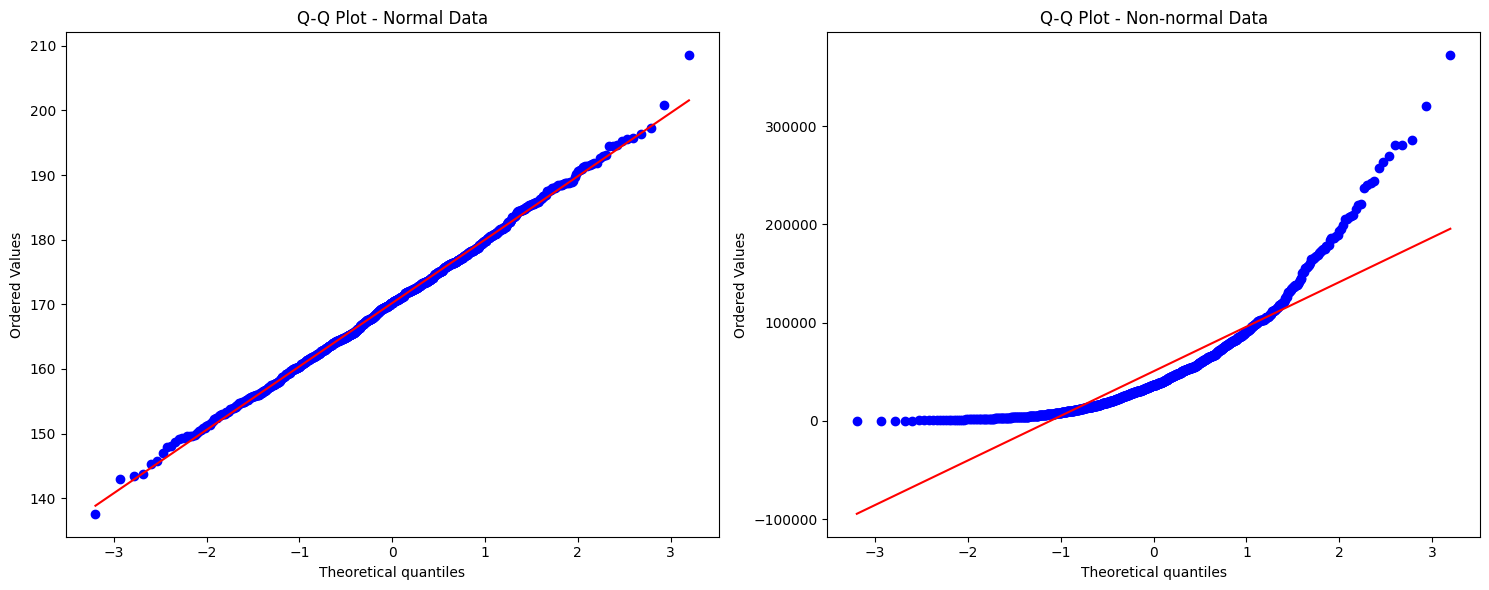

In [4]:
# 3. Q-Q Plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Normal Q-Q plot
stats.probplot(normal_data, dist="norm", plot=ax1)
ax1.set_title("Q-Q Plot - Normal Data")

# Non-normal Q-Q plot
stats.probplot(non_normal_data, dist="norm", plot=ax2)
ax2.set_title("Q-Q Plot - Non-normal Data")
plt.tight_layout()
plt.show()

## Statistical Tests

### Tests for normality

* **Shapiro-Wilk Test**: Best for small samples (n < 5000)
    * **Null Hypothesis**: The data is normally distributed
    * **Test Statistic**: W is calculated based on the sample data, measuring the agreement between the sample data and the normal distribution.
    * If p-value < 0.05, reject the null hypothesis, indicating that the data is **not** normally distributed.
* **Anderson-Darling Test**: Gives more weight to tails of distribution - more sensitive to deviations in tails
  * **Null hypothesis**: The data is normally distributed
  * **Test Statistic**: A^2 is calculated based on the sample data, measuring the distance between the empirical distriution of the sample data and the cumulative distribution function (CDF) of the specified distribution (in this case, the normal distribution).
  * **Critical values**: The test provides critical values for different significance levels depending on the sample size.
  * If the test statistic is greater than the critical value, reject the null hypothesis, indicating that the data is **not** normally distributed.
* **D'Agostino-Pearson Test**: Based on skewness and kurtosis
  * **Null Hypothesis**: The data is normally distributed
  * **Test Statistic**: K² is calculated based on the sample data, combining measures of skewness and kurtosis to assess normality.
  * **p-value**: If p-value < 0.05, reject the null hypothesis, indicating that the data is **not** normally distributed.

### other tests

* **Kolmogorov-Smirnov Test**: Can be used to test normality, but not common - mainly used to compare two distributions
  * goodness-of-fit test (one-sample k-s test) - to test if a sample comes from a specific distribution (e.g., normal, exponential)
  * two-sample k-s test - to test if two samples come from the same distribution 
* **Lilliefors Test**: A modification of the Kolmogorov-Smirnov test for normality
  * To test for normality when mean and variance are unknown and need to be estimated from the data
  * **Null Hypothesis**: The data is normally distributed
  * **Test Statistic**: D is calculated based on the sample data, measuring the distance between the empirical distribution of the sample data and the cumulative distribution function (CDF) of the normal distribution - same as K-S but parameters are estimated from the data
* * **Jarque-Bera Test**: Based on skewness and kurtosis, especially useful for large samples
  * To test whether sample data has the skewness and kurtosis matching a normal distribution
  * **Null Hypothesis**: The data is normally distributed
  * **Test Statistic**: JB is calculated based on the sample data, combining measures of skewness and kurtosis to assess normality.
* **Shapiro-Francia Test**: Similar to Shapiro-Wilk but uses a different test statistic, especially useful for large samples
  * **Null Hypothesis**: The data is normally distributed
  * **Test Statistic**: W' is calculated based on the sample data, measuring the agreement between the sample data and the normal distribution.
  * If p-value < 0.05, reject the null hypothesis, indicating that the data is **not** normally distributed.

### Which test?

#### Decision Making Process for Choosing Normality Tests

**Sample Size:**

- **Small Samples (n < 50)**: Use the Shapiro-Wilk Test.
- **Medium Samples (50 ≤ n < 5000)**: Use the Shapiro-Wilk Test or Anderson-Darling Test.
- **Large Samples (n ≥ 5000)**: Use the Kolmogorov-Smirnov Test or Jarque-Bera Test.

**Sensitivity to Tails:**

- **Sensitive to Tails**: Use the Anderson-Darling Test.

**Skewness and Kurtosis:**

- **Based on Skewness and Kurtosis**: Use the Jarque-Bera Test.

**Unknown Parameters**:

- **Parameters Estimated from Data**: Use the Lilliefors Test.

**General Purpose:**

- Versatile for Any Distribution: Use the Kolmogorov-Smirnov Test.

**Large Sample Sizes**:

- **Specifically for Large Samples**: Use the Shapiro-Francia Test.

**Summary**

- Shapiro-Wilk Test: Best for small to medium samples
- Anderson-Darling Test: Sensitive to deviations in tails, suitable for medium samples.
- Kolmogorov-Smirnov Test: General purpose, suitable for large samples.
- Jarque-Bera Test: Based on skewness and kurtosis, suitable for large samples.
- Lilliefors Test: For unknown parameters, suitable for normality testing.
- Shapiro-Francia Test: Specifically for large samples.

In [7]:
## Normality functions

def run_shapiro_wilk(data):
    """
    Perform Shapiro-Wilk test for normality.
    
    Parameters:
    data (array-like): Data to test
    
    Returns:
    dict: Test results including statistic, p-value and interpretation
    """
    statistic, p_value = stats.shapiro(data)
    return {
        'name': 'Shapiro-Wilk',
        'statistic': statistic,
        'p_value': p_value,
        'interpretation': 'Data is normal if p > 0.05',
        'is_normal': p_value > 0.05
    }

def run_anderson_darling(data):
    """
    Perform Anderson-Darling test for normality.
    
    Parameters:
    data (array-like): Data to test
    
    Returns:
    dict: Test results including statistic, critical values and interpretation
    """
    result = stats.anderson(data, dist='norm')
    critical_values_dict = dict(zip([15, 10, 5, 2.5, 1], result.critical_values))
    return {
        'name': 'Anderson-Darling',
        'statistic': result.statistic,
        'critical_values': critical_values_dict,
        'significance_levels': [15, 10, 5, 2.5, 1],
        'interpretation': 'Data is normal if statistic < critical value',
        'is_normal': result.statistic < result.critical_values[2]  # Using 5% significance level
    }

def run_kolmogorov_smirnov(data):
    """
    Perform Kolmogorov-Smirnov test for normality.
    
    Parameters:
    data (array-like): Data to test
    
    Returns:
    dict: Test results including statistic, p-value and interpretation
    """
    # Standardize the data
    data_standardized = (data - np.mean(data)) / np.std(data)
    statistic, p_value = kstest(data_standardized, 'norm')
    return {
        'name': 'Kolmogorov-Smirnov',
        'statistic': statistic,
        'p_value': p_value,
        'interpretation': 'Data is normal if p > 0.05',
        'is_normal': p_value > 0.05
    }

def run_jarque_bera(data):
    """
    Perform Jarque-Bera test for normality.
    
    Parameters:
    data (array-like): Data to test
    
    Returns:
    dict: Test results including statistic, p-value and interpretation
    """
    statistic, p_value = stats.jarque_bera(data)
    return {
        'name': 'Jarque-Bera',
        'statistic': statistic,
        'p_value': p_value,
        'interpretation': 'Data is normal if p > 0.05',
        'is_normal': p_value > 0.05
    }

def run_lilliefors(data):
    """
    Perform Lilliefors test for normality.
    
    Parameters:
    data (array-like): Data to test
    
    Returns:
    dict: Test results including statistic, p-value and interpretation
    """
    statistic, p_value = lilliefors(data)
    return {
        'name': 'Lilliefors',
        'statistic': statistic,
        'p_value': p_value,
        'interpretation': 'Data is normal if p > 0.05',
        'is_normal': p_value > 0.05
    }

def run_shapiro_francia(data):
    """
    Approximate Shapiro-Francia test using power transformation.
    Note: This is an approximation as the exact test isn't readily available in Python.
    
    Parameters:
    data (array-like): Data to test
    
    Returns:
    dict: Test results including correlation coefficient and interpretation
    """
    # Sort the data
    data_sorted = np.sort(data)
    
    # Generate normal quantiles
    n = len(data_sorted)
    quantiles = stats.norm.ppf(np.arange(1, n + 1) / (n + 1))
    
    # Calculate correlation
    correlation = np.corrcoef(data_sorted, quantiles)[0, 1]
    
    return {
        'name': 'Shapiro-Francia (approximation)',
        'correlation': correlation,
        'interpretation': 'Higher correlation (closer to 1) suggests normality',
        'is_normal': correlation > 0.995  # This is a rule of thumb threshold
    }

In [8]:
## function to run all normality tests

def run_all_normality_tests(data, dataset_name):
    """
    Run all normality tests and display results in a formatted way.
    
    Parameters:
    data (array-like): Data to test
    dataset_name (str): Name of the dataset for display purposes
    """
    # Run all tests
    tests = [
        run_shapiro_wilk(data),
        run_anderson_darling(data),
        run_kolmogorov_smirnov(data),
        run_jarque_bera(data),
        run_lilliefors(data),
        run_shapiro_francia(data)
    ]
    
    print(f"\nNormality Tests Results for {dataset_name}:")
    print("=" * 70)
    
    for i, test in enumerate(tests, 1):
        print(f"\n{i}. {test['name']} Test:")
        print("-" * 50)
        
        # Print common attributes
        for key, value in test.items():
            if key not in ['name', 'is_normal']:
                print(f"{key.replace('_', ' ').title()}: {value}")
        
        # Print normality conclusion
        if 'is_normal' in test:
            print(f"Conclusion: {'Normal' if test['is_normal'] else 'Not normal'}")
        
    print("\nNote: Different tests may give different results due to their varying sensitivities")
    print("It's recommended to consider multiple tests along with visual inspection")

In [9]:
# Example usage:
run_all_normality_tests(normal_data, "Normal Distribution")
# run_all_normality_tests(non_normal_data, "Non-normal Distribution")


Normality Tests Results for Normal Distribution:

1. Shapiro-Wilk Test:
--------------------------------------------------
Statistic: 0.9986082911491394
P Value: 0.6266290545463562
Interpretation: Data is normal if p > 0.05
Conclusion: Normal

2. Anderson-Darling Test:
--------------------------------------------------
Statistic: 0.3474697767348971
Critical Values: {15: 0.574, 10: 0.653, 5: 0.784, 2.5: 0.914, 1: 1.088}
Significance Levels: [15, 10, 5, 2.5, 1]
Interpretation: Data is normal if statistic < critical value
Conclusion: Normal

3. Kolmogorov-Smirnov Test:
--------------------------------------------------
Statistic: 0.021479979161405482
P Value: 0.7369569123250448
Interpretation: Data is normal if p > 0.05
Conclusion: Normal

4. Jarque-Bera Test:
--------------------------------------------------
Statistic: 2.4563732018798623
P Value: 0.2928231016469398
Interpretation: Data is normal if p > 0.05
Conclusion: Normal

5. Lilliefors Test:
---------------------------------------

In [10]:
# Example usage - Non-normal data:
run_all_normality_tests(non_normal_data, "Non-normal Distribution")


Normality Tests Results for Non-normal Distribution:

1. Shapiro-Wilk Test:
--------------------------------------------------
Statistic: 0.8155856728553772
P Value: 2.520662494978141e-32
Interpretation: Data is normal if p > 0.05
Conclusion: Not normal

2. Anderson-Darling Test:
--------------------------------------------------
Statistic: 45.29756757774976
Critical Values: {15: 0.574, 10: 0.653, 5: 0.784, 2.5: 0.914, 1: 1.088}
Significance Levels: [15, 10, 5, 2.5, 1]
Interpretation: Data is normal if statistic < critical value
Conclusion: Not normal

3. Kolmogorov-Smirnov Test:
--------------------------------------------------
Statistic: 0.1581066168615774
P Value: 2.6595715950961365e-22
Interpretation: Data is normal if p > 0.05
Conclusion: Not normal

4. Jarque-Bera Test:
--------------------------------------------------
Statistic: 1859.7018247803746
P Value: 0.0
Interpretation: Data is normal if p > 0.05
Conclusion: Not normal

5. Lilliefors Test:
------------------------------